In [1]:
import numpy as np

import matplotlib.pyplot as plt
import myMPSstuff as mps
import myMPOstuff as mpo
import applMPOMPS as mpomps

from isingMPO import IsingMPO, OneMinusEpsHIsingMPO, expMinusEpsHIsingMPO

from powerMethod import power_method

from oned_ising_tenpy import example_DMRG_tf_ising_finite

In [2]:
# Apply MPO to MPS operations 

LLL = 20

# maximum chi 
chiM = 40

gg = 0.4

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

psi = mps.myMPS(mps.randMPS(LLL))
#psi = mps.myMPS([np.ones(2)]*LLL)


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 100, HMPO = Hising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=20, g=0.40
E = -19.8900466137288
final bond dimensions:  [2, 4, 8, 14, 18, 22, 24, 24, 26, 26, 26, 24, 24, 22, 18, 14, 8, 4, 2]
midchainEE: 0.6943389921906786 


100, chi/max 34/40: 100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


max chi reached(/max): 40/40, final dSmid = 3.0115335163838353e-05
0.6454174092052561 -19.88753232529777


In [3]:
print(mpomps.expValMPO(opsi,Hising))
print(mpomps.expValMPO(opsi,Uising))

-19.88753232529777
2.988753232529775


(-0.1, 0.1)

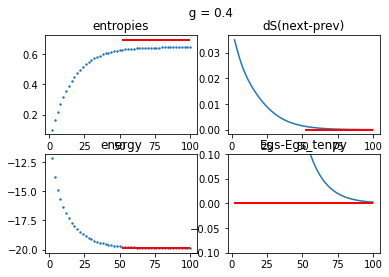

In [4]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[0], xmax=iter[-1], linewidth=2, color='r')
ax[3].set_ylim(-0.1,0.1)




## what if instead we try and apply Hising directly ? 


In [5]:

LLL = 20

# maximum chi 
chiM = 60

psi = mps.myMPS(mps.randMPS(LLL))

opsi, iter, ents, devec, energies = power_method(Hising, psi, chiM = chiM, iters = 100)


print(ents[-1],energies[-1])


Returning energies as expectation value of the evolution MPO


100, chi/max 48/60: 100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


max chi reached(/max): 60/60, final dSmid = 7.613682881935091e-07
0.6576656479926 -19.883080330358187


(-0.1, 0.1)

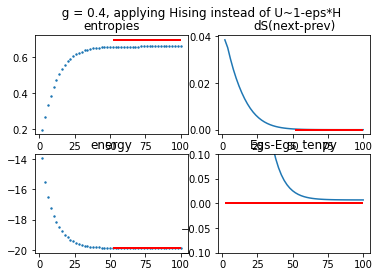

In [6]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}, applying Hising instead of U~1-eps*H')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[0], xmax=iter[-1], linewidth=2, color='r')
ax[3].set_ylim(-0.1,0.1)



## Critical Ising (g=1)


In [7]:

LLL = 20

# maximum chi 
chiM = 60

gg = 1.


# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]



# my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1.0, g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 300, HMPO = Hising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=20, g=1.00
E = -25.1077971116238
final bond dimensions:  [2, 4, 8, 16, 26, 34, 41, 43, 45, 46, 45, 43, 41, 34, 26, 16, 8, 4, 2]
midchainEE: 0.4437994306157701 


300, chi/max 42/60: 100%|██████████| 300/300 [01:51<00:00,  2.68it/s]

max chi reached(/max): 60/60, final dSmid = 3.427141712636361e-05
0.44163744042424186 -25.107676222193675


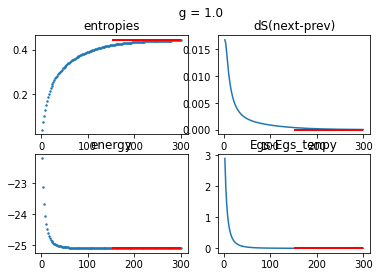

In [8]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


In [9]:
#New data to check N=4 delta_t =0.1 c_g =0.9
#MPO expected value 1.56831482176985
#Entropy mid chain 0.332330405177682

# Apply MPO to MPS operations 

LLL = 4

# maximum chi 
chiM = 60

gg = 0.9

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 200, HMPO = Uising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=4, g=0.90
E = -4.4426730871153
final bond dimensions:  [2, 4, 2]
midchainEE: 0.33445817829069296 


200, chi/max 4/5: 100%|██████████| 200/200 [00:06<00:00, 29.62it/s]

max chi reached(/max): 5/60, final dSmid = 3.981326379687289e-11
0.3344581777889018 1.4442673086027906


In [11]:
mpomps.expValMPO(opsi,Uising)

array(1.44426731)

In [ ]:
LLL = 20

# maximum chi 
chiM = 50

gg = 1.1

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(expMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1, mode="svd"))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 100, HMPO= Hising)


print(ents[-1],energies[-1])

In [ ]:
testsvd = expMinusEpsHIsingMPO(5, J=1., g=1.1, eps=0.1, mode="svd")
np.shape(testsvd[-1])
fi=testsvd[0].reshape(2,2,2)
la=testsvd[-1].reshape(2,2,2)
print(np.all(fi-la < 1e-14))
print(fi-la)